<a href="https://colab.research.google.com/github/DD-SQUARED/University-Physics-Projects/blob/main/Standard_final_stars.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

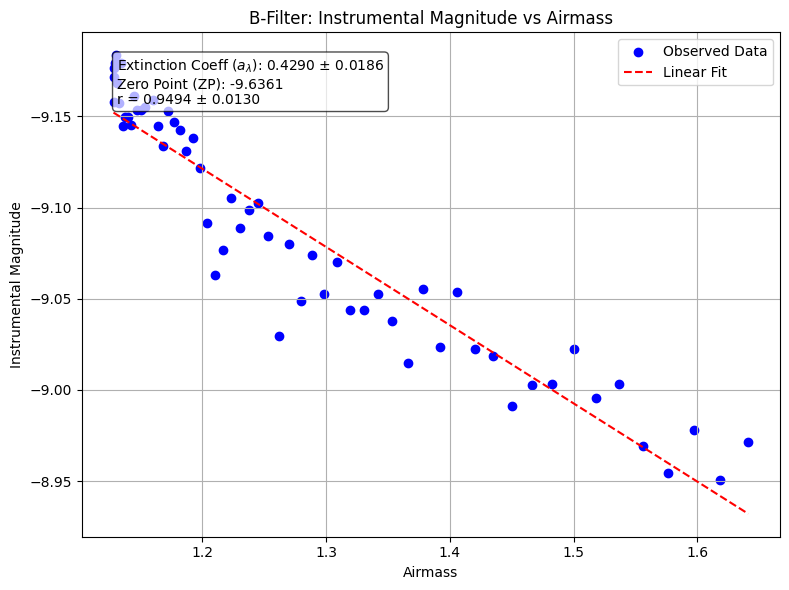

B Filter:
  Extinction Coefficient (a_lambda): 0.4290 ± 0.0186
  Zero Point (ZP): -9.6361
  Correlation coefficient (r): 0.9494 ± 0.0130



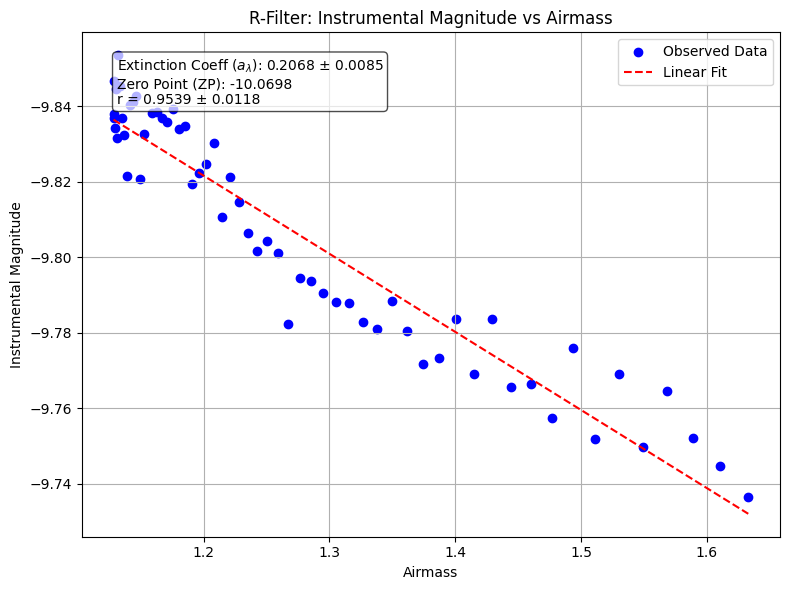

R Filter:
  Extinction Coefficient (a_lambda): 0.2068 ± 0.0085
  Zero Point (ZP): -10.0698
  Correlation coefficient (r): 0.9539 ± 0.0118



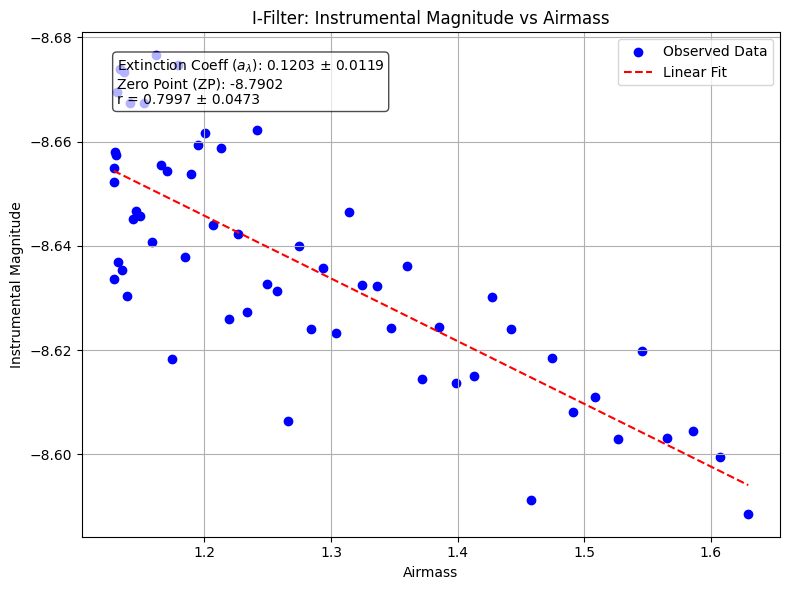

I Filter:
  Extinction Coefficient (a_lambda): 0.1203 ± 0.0119
  Zero Point (ZP): -8.7902
  Correlation coefficient (r): 0.7997 ± 0.0473



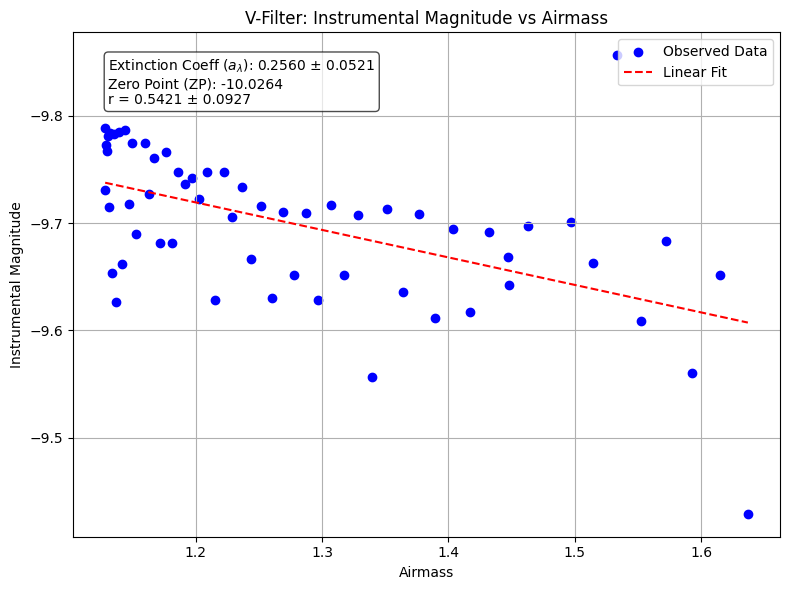

V Filter:
  Extinction Coefficient (a_lambda): 0.2560 ± 0.0521
  Zero Point (ZP): -10.0264
  Correlation coefficient (r): 0.5421 ± 0.0927



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# === Define file names per filter ===
files = {
    "B": "B.csv",
    "R": "R.csv",
    "I": "I.csv",
    "V": "V.csv"
}

# === Loop through each filter ===
for filt, file in files.items():
    # Read the CSV file
    df = pd.read_csv(file)

    # Check and compute Instrumental Magnitude if necessary
    if "Instrumental_Mag" not in df.columns:
        if "Count_Rate" in df.columns:
            df["Instrumental_Mag"] = -2.5 * np.log10(df["Count_Rate"])
        else:
            print(f"Missing 'Instrumental_Mag' and 'Count_Rate' in {file}")
            continue

    # Drop rows with NaN values in key columns
    df = df.dropna(subset=["Airmass", "Instrumental_Mag"])

    # Number of valid data points
    n = len(df)

    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(df["Airmass"], df["Instrumental_Mag"])

    # Calculate standard error of r
    se_r = (1 - r_value**2) / np.sqrt(n - 2) if n > 2 else np.nan

    # Prepare values for line plot
    x_vals = np.linspace(df["Airmass"].min(), df["Airmass"].max(), 100)
    y_vals = intercept + slope * x_vals

    # Create the plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df["Airmass"], df["Instrumental_Mag"], color='blue', label='Observed Data')
    plt.plot(x_vals, y_vals, color='red', linestyle='--', label='Linear Fit')

    # Labels and title
    plt.xlabel("Airmass")
    plt.ylabel("Instrumental Magnitude")
    plt.title(f"{filt}-Filter: Instrumental Magnitude vs Airmass")
    plt.gca().invert_yaxis()  # Invert Y-axis for magnitudes

    # Fit information box including r error margin
    textstr = (
        f"Extinction Coeff ($a_λ$): {slope:.4f} ± {std_err:.4f}\n"
        f"Zero Point (ZP): {intercept:.4f}\n"
        f"r = {r_value:.4f} ± {se_r:.4f}"
    )
    plt.text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
             fontsize=10, verticalalignment='top',
             bbox=dict(boxstyle="round", facecolor='white', alpha=0.7))

    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

    # Print regression results
    print(f"{filt} Filter:")
    print(f"  Extinction Coefficient (a_lambda): {slope:.4f} ± {std_err:.4f}")
    print(f"  Zero Point (ZP): {intercept:.4f}")
    print(f"  Correlation coefficient (r): {r_value:.4f} ± {se_r:.4f}")
    print()
